In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_json('transactions.txt', lines=True)
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [16]:
corr = df.select_dtypes(include=np.number).corr()
corr

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
accountNumber,1.000000,1.000000,0.140673,0.066345,-0.001364,-0.011432,-0.011376,0.038517,0.162248
customerId,1.000000,1.000000,0.140673,0.066345,-0.001364,-0.011432,-0.011376,0.038517,0.162248
creditLimit,0.140673,0.140673,1.000000,0.834977,0.005581,0.051006,0.051088,0.125611,0.653652
availableMoney,0.066345,0.066345,0.834977,1.000000,-0.010070,0.016253,0.016323,0.073879,0.129332
transactionAmount,-0.001364,-0.001364,0.005581,-0.010070,1.000000,-0.000233,-0.000141,-0.001513,0.023905
cardCVV,-0.011432,-0.011432,0.051006,0.016253,-0.000233,1.000000,0.996008,-0.011608,0.069559
enteredCVV,-0.011376,-0.011376,0.051088,0.016323,-0.000141,0.996008,1.000000,-0.011485,0.069610
cardLast4Digits,0.038517,0.038517,0.125611,0.073879,-0.001513,-0.011608,-0.011485,1.000000,0.124745
currentBalance,0.162248,0.162248,0.653652,0.129332,0.023905,0.069559,0.069610,0.124745,1.000000


In [22]:
#Drop columns
cols_drop = ['accountNumber', 'creditLimit', 'dateOfLastAddressChange', 'accountOpenDate', 'currentExpDate', 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd', 'cardLast4Digits', 'expirationDateKeyInMatch']
df = df.drop(columns=cols_drop, axis=1)

In [23]:
#Replace empty strings with 'UNKNOWN'
df = df.replace('', 'UNKNOWN')
#Check if the df still has empty strings
(df == '').any()

,0
customerId,False
availableMoney,False
transactionDateTime,False
transactionAmount,False
merchantName,False
acqCountry,False
merchantCountryCode,False
posEntryMode,False
posConditionCode,False
merchantCategoryCode,False


In [24]:
df['isMatchedCVV'] = df['cardCVV'] == df['enteredCVV']
df=df.drop(columns=['enteredCVV', 'cardCVV'], axis=1)

In [33]:
df=df.drop('customerId', axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customerId            786363 non-null  int64  
 1   availableMoney        786363 non-null  float64
 2   transactionDateTime   786363 non-null  object 
 3   transactionAmount     786363 non-null  float64
 4   merchantName          786363 non-null  object 
 5   acqCountry            786363 non-null  object 
 6   merchantCountryCode   786363 non-null  object 
 7   posEntryMode          786363 non-null  object 
 8   posConditionCode      786363 non-null  object 
 9   merchantCategoryCode  786363 non-null  object 
 10  transactionType       786363 non-null  object 
 11  currentBalance        786363 non-null  float64
 12  cardPresent           786363 non-null  bool   
 13  isFraud               786363 non-null  bool   
 14  isMatchedCVV          786363 non-null  bool   
dtype

In [26]:
corr = df.select_dtypes(include=np.number).corr()
corr

,customerId,availableMoney,transactionAmount,currentBalance
customerId,1.000000,0.066345,-0.001364,0.162248
availableMoney,0.066345,1.000000,-0.010070,0.129332
transactionAmount,-0.001364,-0.010070,1.000000,0.023905
currentBalance,0.162248,0.129332,0.023905,1.000000


In [12]:
df['currentBalance'].describe()

,currentBalance
count,786363.000000
mean,4508.739089
std,6457.442068
min,0.000000
25%,689.910000
50%,2451.760000
75%,5291.095000
max,47498.810000


In [47]:
print(df.groupby('merchantName')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud                       False     True 
merchantName                                 
1st BBQ                    0.984431  0.015569
1st Deli                   0.993766  0.006234
1st Pub                    0.972500  0.027500
1st Restaurant             0.986079  0.013921
1st Sandwitch Bar #119707  0.988476  0.011524
...                             ...       ...
staples.com                0.976502  0.023498
target.com                 0.978469  0.021531
walmart.com                0.973567  0.026433
westelm.com                0.987952  0.012048
williamssonoma.com         0.995992  0.004008

[2490 rows x 2 columns]


In [34]:
df_1 = df.copy()

In [35]:
df_1.nunique()

,0
availableMoney,521915
transactionDateTime,776637
transactionAmount,66038
merchantName,2490
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4
merchantCategoryCode,19
transactionType,4


/tmp/ipython-input-37-596486237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='YlOrBr')


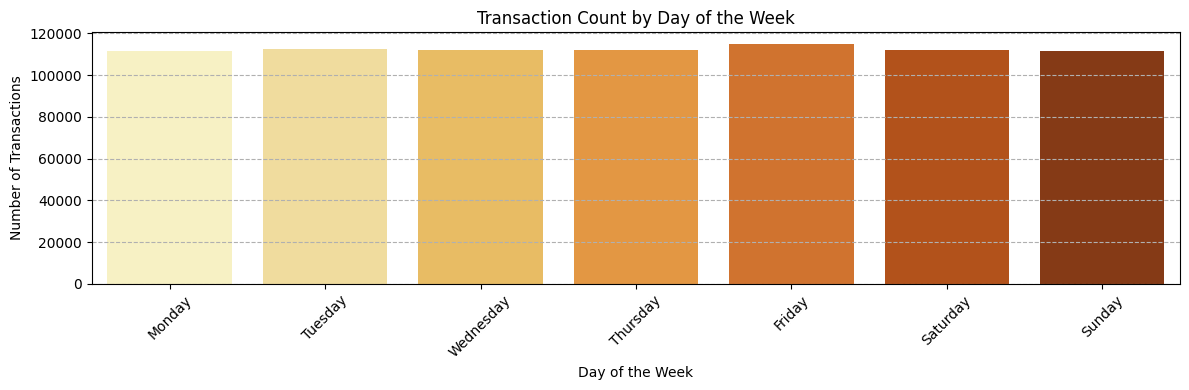

In [37]:
# Extract the day of the week
#df_1['Day_of_Week'] = df_1['transactionDateTime'].dt.day_name()

# Group by day of the week and count transactions
weekday_counts = pd.to_datetime(df_1['transactionDateTime']).dt.day_name().value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='YlOrBr')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

/tmp/ipython-input-38-1353528026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='YlGnBu')


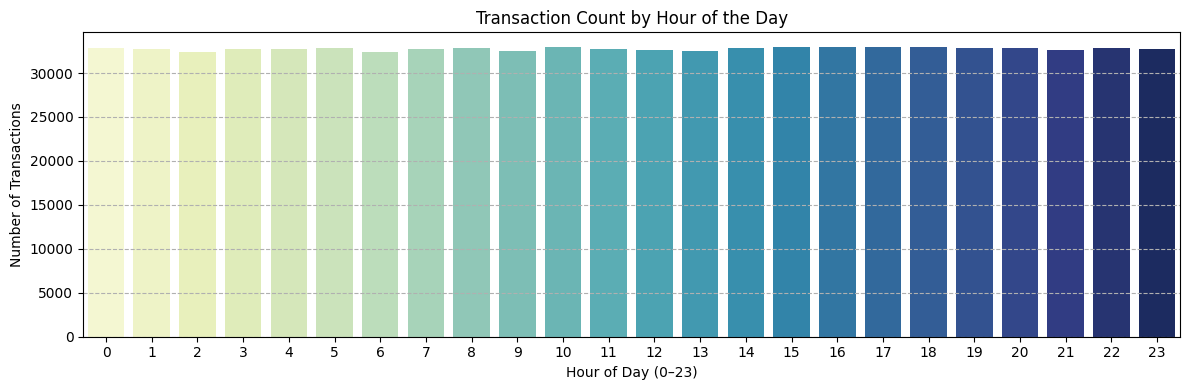

In [38]:
# Convert to datetime and extract hour
hour_counts = pd.to_datetime(df_1['transactionDateTime']).dt.hour.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 4))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='YlGnBu')
plt.title('Transaction Count by Hour of the Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

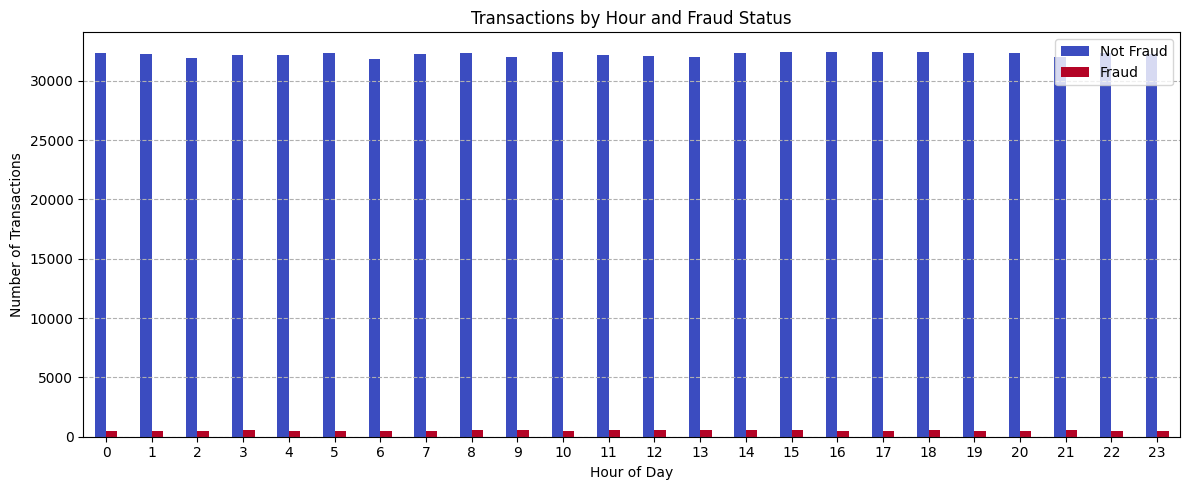

In [39]:
df_1['hour'] = pd.to_datetime(df_1['transactionDateTime']).dt.hour
hourly_counts = df_1.groupby(['hour', 'isFraud']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 5))
hourly_counts.plot(kind='bar', stacked=False, colormap='coolwarm', figsize=(12, 5))
plt.title('Transactions by Hour and Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


In [43]:
df1 = df.copy()

In [44]:
df1 = df1.drop('transactionDateTime', axis=1)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   availableMoney        786363 non-null  float64
 1   transactionAmount     786363 non-null  float64
 2   merchantName          786363 non-null  object 
 3   acqCountry            786363 non-null  object 
 4   merchantCountryCode   786363 non-null  object 
 5   posEntryMode          786363 non-null  object 
 6   posConditionCode      786363 non-null  object 
 7   merchantCategoryCode  786363 non-null  object 
 8   transactionType       786363 non-null  object 
 9   currentBalance        786363 non-null  float64
 10  cardPresent           786363 non-null  bool   
 11  isFraud               786363 non-null  bool   
 12  isMatchedCVV          786363 non-null  bool   
dtypes: bool(3), float64(3), object(7)
memory usage: 62.2+ MB


In [53]:
# Calculate fraud rate and count per merchant
merchant_fraud_stats = df1.groupby('merchantName')['isFraud'].value_counts(normalize=True).unstack(level=-1)

top_fraud_merchants = merchant_fraud_stats.sort_values(by=True, ascending=False)

# Display top 10 merchants with highest fraud rates
top_fraud_merchants.head(10)


isFraud,False,True
merchantName,,
In-N-Out #949129,0.887640,0.112360
American Airlines,0.906021,0.093979
In-N-Out #863086,0.906250,0.093750
In-N-Out #463194,0.916667,0.083333
In-N-Out #422833,0.918182,0.081818
In-N-Out #567597,0.921348,0.078652
Walgreens #475572,0.928571,0.071429
In-N-Out #17755,0.931373,0.068627
Fresh Flowers,0.933645,0.066355


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   availableMoney        786363 non-null  float64
 1   transactionAmount     786363 non-null  float64
 2   merchantName          786363 non-null  object 
 3   acqCountry            786363 non-null  object 
 4   merchantCountryCode   786363 non-null  object 
 5   posEntryMode          786363 non-null  object 
 6   posConditionCode      786363 non-null  object 
 7   merchantCategoryCode  786363 non-null  object 
 8   transactionType       786363 non-null  object 
 9   currentBalance        786363 non-null  float64
 10  cardPresent           786363 non-null  bool   
 11  isFraud               786363 non-null  bool   
 12  isMatchedCVV          786363 non-null  bool   
dtypes: bool(3), float64(3), object(7)
memory usage: 62.2+ MB


In [71]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

def target_encode_kfold(df, cat_col, target_col, n_splits=5, smoothing=10, seed=42):
    """
    Performs K-fold target encoding with smoothing.

    Parameters:
        df: pandas DataFrame
        cat_col: column to encode (e.g., 'merchantName')
        target_col: target variable (e.g., 'isFraud')
        n_splits: number of folds
        smoothing: strength of smoothing (higher = closer to global mean)
        seed: random seed for reproducibility

    Returns:
        A pandas Series with the encoded values
    """
    df = df.copy()
    global_mean = df[target_col].mean()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    encoded = pd.Series(index=df.index, dtype='float64')

    for train_idx, val_idx in kf.split(df):
        train, val = df.iloc[train_idx], df.iloc[val_idx]

        # Calculate mean and count per category in training fold
        agg = train.groupby(cat_col)[target_col].agg(['mean', 'count'])
        means = agg['mean']
        counts = agg['count']

        # Apply smoothing
        smooth = (means * counts + global_mean * smoothing) / (counts + smoothing)

        # Map smoothed values to validation fold
        val_encoded = val[cat_col].map(smooth)
        val_encoded.fillna(global_mean, inplace=True)  # fallback for unseen categories

        encoded.iloc[val_idx] = val_encoded

    return encoded


In [72]:
df1['merchantName_te'] = target_encode_kfold(df1, cat_col='merchantName', target_col='isFraud')

In [73]:
df1 = df1.drop(columns=['merchantName'], axis=1)

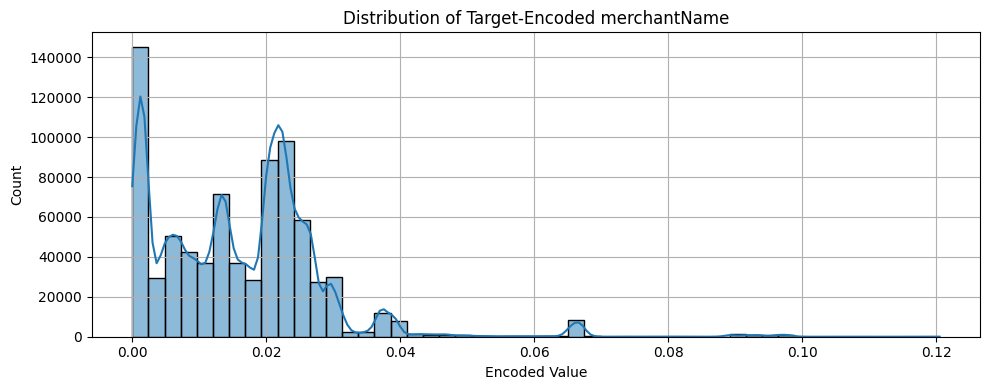

In [74]:

plt.figure(figsize=(10, 4))
sns.histplot(df1['merchantName_te'], bins=50, kde=True)
plt.title('Distribution of Target-Encoded merchantName')
plt.xlabel('Encoded Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   availableMoney        786363 non-null  float64
 1   transactionAmount     786363 non-null  float64
 2   acqCountry            786363 non-null  object 
 3   merchantCountryCode   786363 non-null  object 
 4   posEntryMode          786363 non-null  object 
 5   posConditionCode      786363 non-null  object 
 6   merchantCategoryCode  786363 non-null  object 
 7   transactionType       786363 non-null  object 
 8   currentBalance        786363 non-null  float64
 9   cardPresent           786363 non-null  bool   
 10  isFraud               786363 non-null  bool   
 11  isMatchedCVV          786363 non-null  bool   
 12  merchantName_te       786363 non-null  float64
dtypes: bool(3), float64(4), object(6)
memory usage: 62.2+ MB


In [78]:
df1.nunique()

,0
availableMoney,521915
transactionAmount,66038
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4
merchantCategoryCode,19
transactionType,4
currentBalance,487318
cardPresent,2


In [ ]:
import numpy as np
df1['transactionAmount_log'] = np.log1p(df1['transactionAmount'])  # log(1 + x)


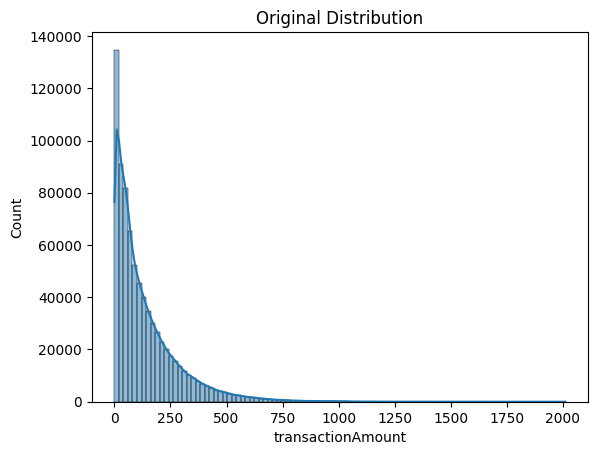

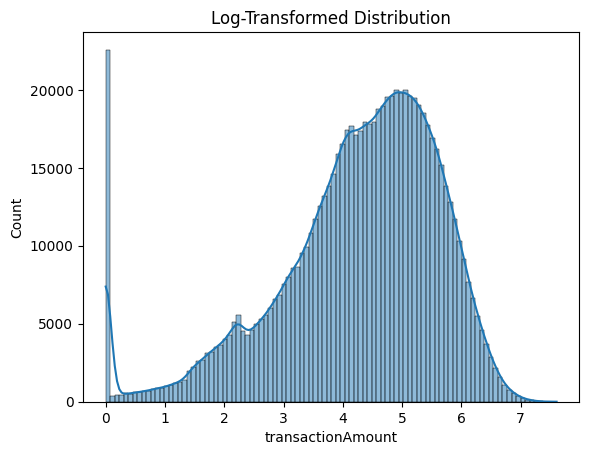

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['transactionAmount'], bins=100, kde=True)
plt.title("Original Distribution")

plt.figure()
sns.histplot(np.log1p(df1['transactionAmount']), bins=100, kde=True)
plt.title("Log-Transformed Distribution")
plt.show()


In [81]:
df1.nunique()

,0
availableMoney,521915
transactionAmount,66038
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4
merchantCategoryCode,19
transactionType,4
currentBalance,487318
cardPresent,2


In [89]:
df1['merchantCategoryCode_te'] = target_encode_kfold(
    df1,
    cat_col='merchantCategoryCode',
    target_col='isFraud',
    n_splits=5,
    smoothing=10
)


KeyError: 'merchantCategoryCode'

In [85]:
df1 = df1.drop(columns=['merchantCategoryCode'], axis=1)


In [88]:
df1.nunique()

,0
availableMoney,521915
transactionAmount,66038
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4
transactionType,4
currentBalance,487318
cardPresent,2
isFraud,2


In [92]:
df1['posEntryMode_te'] = target_encode_kfold(
    df1,
    cat_col='posEntryMode',
    target_col='isFraud',
    n_splits=5,
    smoothing=10
)
df1 = df1.drop(columns=['posEntryMode'], axis=1)


In [93]:
df1['acqCountry_te'] = target_encode_kfold(
    df1,
    cat_col='acqCountry',
    target_col='isFraud',
    n_splits=5,
    smoothing=10
)
df1 = df1.drop(columns=['acqCountry'], axis=1)

In [94]:
df1['merchantCountryCode_te'] = target_encode_kfold(
    df1,
    cat_col='merchantCountryCode',
    target_col='isFraud',
    n_splits=5,
    smoothing=10
)
df1 = df1.drop(columns=['merchantCountryCode'], axis=1)

In [95]:

df1['posConditionCode_te'] = target_encode_kfold(
    df1,
    cat_col='posConditionCode',
    target_col='isFraud',
    n_splits=5,
    smoothing=10
)
df1 = df1.drop(columns=['posConditionCode'], axis=1)

In [96]:

df1['transactionType_te'] = target_encode_kfold(
    df1,
    cat_col='transactionType',
    target_col='isFraud',
    n_splits=5,
    smoothing=10
)
df1 = df1.drop(columns=['transactionType'], axis=1)

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   availableMoney           786363 non-null  float64
 1   transactionAmount        786363 non-null  float64
 2   currentBalance           786363 non-null  float64
 3   cardPresent              786363 non-null  bool   
 4   isFraud                  786363 non-null  bool   
 5   isMatchedCVV             786363 non-null  bool   
 6   merchantName_te          786363 non-null  float64
 7   merchantCategoryCode_te  786363 non-null  float64
 8   posEntryMode_te          786363 non-null  float64
 9   acqCountry_te            786363 non-null  float64
 10  merchantCountryCode_te   786363 non-null  float64
 11  posConditionCode_te      786363 non-null  float64
 12  transactionType_te       786363 non-null  float64
dtypes: bool(3), float64(10)
memory usage: 62.2 MB


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [99]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    cf = confusion_matrix(y_test, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show()

    print("\n")
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('F1: {:.2f}%'.format(f1*100))


In [100]:

X = df1.drop(['isFraud'], axis=1)
y = df1['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


In [101]:
from sklearn.ensemble import RandomForestClassifier

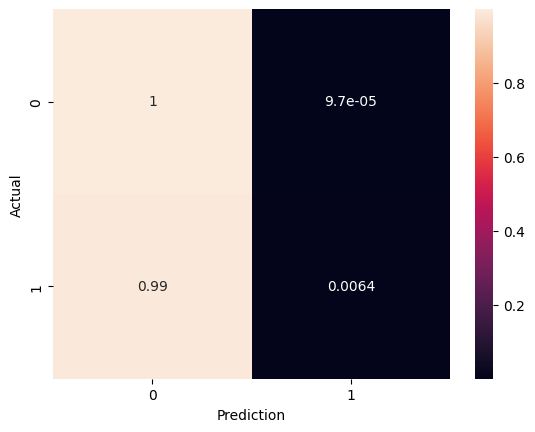



Accuracy: 98.42%
Precision: 51.61%
Recall: 0.64%
F1: 1.27%


In [102]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [103]:
df2 = df1.copy()

In [105]:
df2['transactionAmount'] = np.log1p(df2['transactionAmount'])

In [106]:
df2['currentBalance'] = np.log1p(df2['currentBalance'])

In [108]:
df2['availableMoney'] = np.log1p(df2['availableMoney'])

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   availableMoney           783447 non-null  float64
 1   transactionAmount        786363 non-null  float64
 2   currentBalance           786363 non-null  float64
 3   cardPresent              786363 non-null  bool   
 4   isFraud                  786363 non-null  bool   
 5   isMatchedCVV             786363 non-null  bool   
 6   merchantName_te          786363 non-null  float64
 7   merchantCategoryCode_te  786363 non-null  float64
 8   posEntryMode_te          786363 non-null  float64
 9   acqCountry_te            786363 non-null  float64
 10  merchantCountryCode_te   786363 non-null  float64
 11  posConditionCode_te      786363 non-null  float64
 12  transactionType_te       786363 non-null  float64
dtypes: bool(3), float64(10)
memory usage: 62.2 MB


In [113]:
X = df2.drop(['isFraud'], axis=1)
y = df2['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


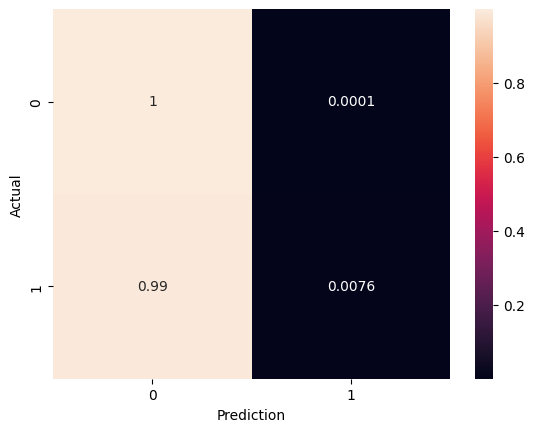



Accuracy: 98.42%
Precision: 54.29%
Recall: 0.76%
F1: 1.50%


In [114]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [115]:
df3 = df.copy()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   availableMoney        786363 non-null  float64
 1   transactionDateTime   786363 non-null  object 
 2   transactionAmount     786363 non-null  float64
 3   merchantName          786363 non-null  object 
 4   acqCountry            786363 non-null  object 
 5   merchantCountryCode   786363 non-null  object 
 6   posEntryMode          786363 non-null  object 
 7   posConditionCode      786363 non-null  object 
 8   merchantCategoryCode  786363 non-null  object 
 9   transactionType       786363 non-null  object 
 10  currentBalance        786363 non-null  float64
 11  cardPresent           786363 non-null  bool   
 12  isFraud               786363 non-null  bool   
 13  isMatchedCVV          786363 non-null  bool   
dtypes: bool(3), float64(3), object(8)
memory usage: 68.2

In [117]:
df3 = df3.drop(columns=['transactionDateTime', 'merchantName'], axis=1)

In [119]:
cat_cols = ['acqCountry', 'merchantCountryCode', 'posEntryMode',
                    'posConditionCode', 'merchantCategoryCode', 'transactionType']

df3 = pd.get_dummies(df3, columns=cat_cols, drop_first=True)

In [121]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 43 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   availableMoney                             786363 non-null  float64
 1   transactionAmount                          786363 non-null  float64
 2   currentBalance                             786363 non-null  float64
 3   cardPresent                                786363 non-null  bool   
 4   isFraud                                    786363 non-null  bool   
 5   isMatchedCVV                               786363 non-null  bool   
 6   acqCountry_MEX                             786363 non-null  bool   
 7   acqCountry_PR                              786363 non-null  bool   
 8   acqCountry_UNKNOWN                         786363 non-null  bool   
 9   acqCountry_US                              786363 non-null  bool   
 10  merchant

In [122]:
X = df3.drop(['isFraud'], axis=1)
y = df3['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


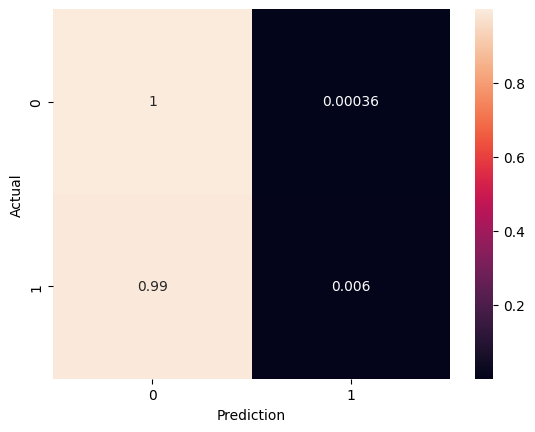



Accuracy: 98.39%
Precision: 21.13%
Recall: 0.60%
F1: 1.17%


In [123]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [125]:
df4 = df1.copy()

In [126]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   availableMoney           786363 non-null  float64
 1   transactionAmount        786363 non-null  float64
 2   currentBalance           786363 non-null  float64
 3   cardPresent              786363 non-null  bool   
 4   isFraud                  786363 non-null  bool   
 5   isMatchedCVV             786363 non-null  bool   
 6   merchantName_te          786363 non-null  float64
 7   merchantCategoryCode_te  786363 non-null  float64
 8   posEntryMode_te          786363 non-null  float64
 9   acqCountry_te            786363 non-null  float64
 10  merchantCountryCode_te   786363 non-null  float64
 11  posConditionCode_te      786363 non-null  float64
 12  transactionType_te       786363 non-null  float64
dtypes: bool(3), float64(10)
memory usage: 62.2 MB


In [128]:
df.groupby('isFraud')[['currentBalance', 'availableMoney', 'transactionAmount']].describe()

currentBalance                                                    \
                 count         mean          std  min       25%      50%   
isFraud                                                                    
False         773946.0  4502.428675  6446.866656  0.0  688.0325  2446.94   
True           12417.0  4902.064338  7074.701649  0.0  822.2100  2747.39   

                           availableMoney               ...                    \
             75%       max          count         mean  ...      75%      max   
isFraud                                                 ...                     
False    5286.10  47498.81       773946.0  6252.455386  ...  7500.00  50000.0   
True     5644.35  47473.94        12417.0  6142.894186  ...  7502.82  50000.0   

        transactionAmount                                                      \
                    count        mean         std  min    25%     50%     75%   
isFraud                                                                         
False            773946.0  135.570249  146.525305  0.0  33.19   86.76  189.39   
True              12417.0  225.215905  189.551393  0.0  86.00  176.98  311.46   

                  
             max  
isFraud           
False    2011.54  
True     1608.35  

[2 rows x 24 columns]

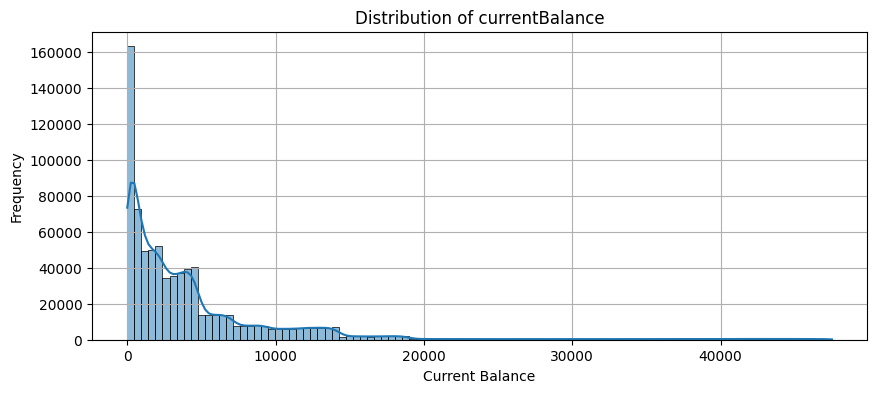

In [129]:
plt.figure(figsize=(10,4))
sns.histplot(df4['currentBalance'], bins=100, kde=True)
plt.title('Distribution of currentBalance')
plt.xlabel('Current Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [132]:
def bucket_balance(x):
    if x <= 100:
        return 1
    elif x <= 500:
        return 2
    elif x <= 1000:
        return 3
    elif x <= 2000:
        return 4
    elif x <= 3000:
        return 5
    elif x <= 4000:
        return 6
    elif x <= 4500:
        return 7
    elif x <= 5000:
        return 8
    elif x <= 6000:
        return 9
    elif x <= 10000:
        return 10
    elif x <= 20000:
        return 11
    else:
        return 12

df4['currentBalance'] =  df4['currentBalance'].apply(bucket_balance)

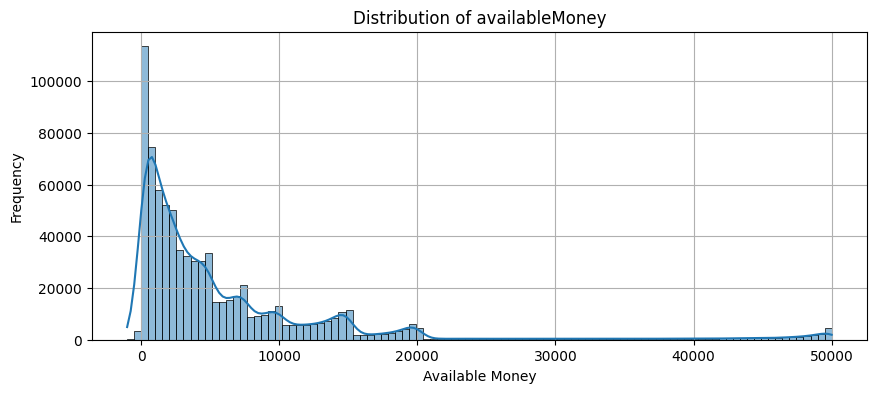

In [134]:
plt.figure(figsize=(10,4))
sns.histplot(df4['availableMoney'], bins=100, kde=True)
plt.title('Distribution of availableMoney')
plt.xlabel('Available Money')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [135]:
def bucket_balance(x):
    if x <= 100:
        return 1
    elif x <= 500:
        return 2
    elif x <= 1000:
        return 3
    elif x <= 2000:
        return 4
    elif x <= 3000:
        return 5
    elif x <= 4000:
        return 6
    elif x <= 4500:
        return 7
    elif x <= 5000:
        return 8
    elif x <= 6000:
        return 9
    elif x <= 10000:
        return 10
    elif x <= 20000:
        return 11
    else:
        return 12

df4['availableMoney'] =  df4['availableMoney'].apply(bucket_balance)

In [136]:
def map(amount):
  if amount <= 50:
    return 1
  elif amount <= 100:
    return 2
  elif amount <= 150:
    return 3
  elif amount <= 200:
    return 4
  elif amount <=250:
    return 5
  elif amount <= 300:
    return 6
  elif amount <= 350:
    return 7
  elif amount <= 400:
    return 8
  elif amount <= 450:
    return 9
  elif amount <= 500:
    return 10
  elif amount <= 1000:
    return 11
  elif amount <= 1500:
    return 12
  else:
    return 13

df4['transactionAmount'] = df4['transactionAmount'].apply(map)

In [137]:
X = df4.drop(['isFraud'], axis=1)
y = df4['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


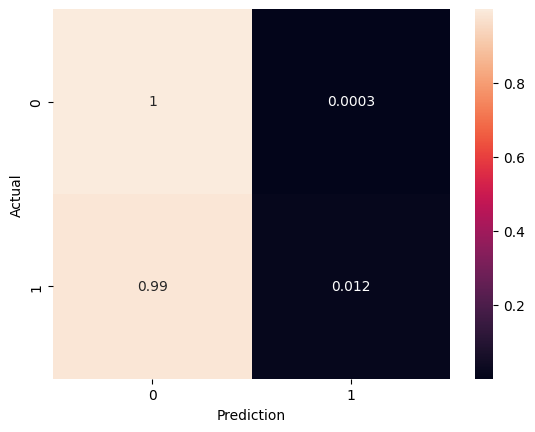



Accuracy: 98.40%
Precision: 38.96%
Recall: 1.20%
F1: 2.33%


In [138]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: isFraud
False    619166
True       9924
Name: count, dtype: int64
After SMOTE: isFraud
False    619166
True     619166
Name: count, dtype: int64


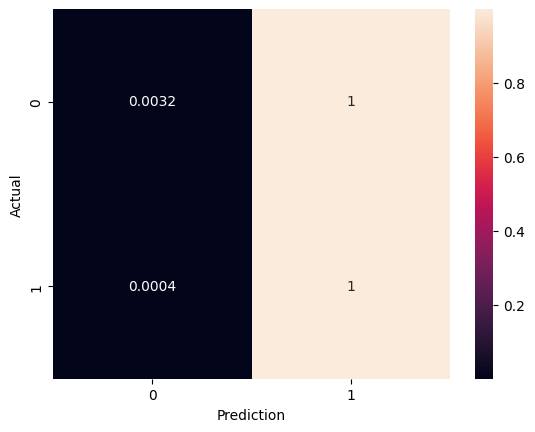



Accuracy: 1.90%
Precision: 1.59%
Recall: 99.96%
F1: 3.13%


In [141]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_smote, y_train_smote)

eval_model(rfc_model, X_test, y_test)

In [152]:
X = df1.drop(['isFraud'], axis=1)
y = df1['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


In [150]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: isFraud
False    619166
True       9924
Name: count, dtype: int64
After SMOTE: isFraud
False    619166
True     619166
Name: count, dtype: int64


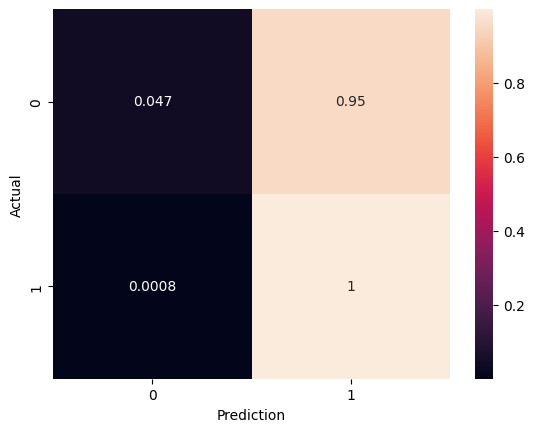



Accuracy: 6.17%
Precision: 1.66%
Recall: 99.92%
F1: 3.27%


In [151]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_smote, y_train_smote)

eval_model(rfc_model, X_test, y_test)

In [155]:
X = df1.drop(['isFraud'], axis=1)
y = df1['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


In [154]:
df1.head()

,availableMoney,transactionAmount,currentBalance,cardPresent,isFraud,isMatchedCVV,merchantName_te,merchantCategoryCode_te,posEntryMode_te,acqCountry_te,merchantCountryCode_te,posConditionCode_te,transactionType_te
0,5000.0,98.55,0.0,False,False,True,0.020090,0.025545,0.017681,0.015778,0.015786,0.016449,0.016154
1,5000.0,74.51,0.0,True,False,True,0.004547,0.011806,0.023652,0.015505,0.015514,0.016097,0.015898
2,5000.0,7.47,0.0,False,False,True,0.000027,0.000013,0.023934,0.015778,0.015786,0.016449,0.016154
3,5000.0,7.47,0.0,False,False,True,0.000027,0.000013,0.024045,0.015674,0.015686,0.016318,0.016042
4,5000.0,71.18,0.0,True,False,True,0.013158,0.009564,0.017465,0.015638,0.015649,0.016244,0.016056


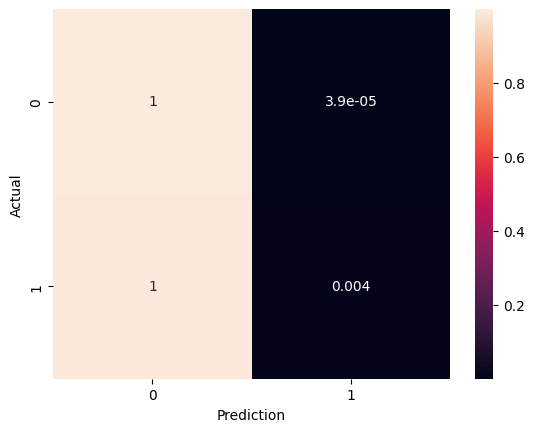



Accuracy: 98.42%
Precision: 62.50%
Recall: 0.40%
F1: 0.80%


In [156]:
rfc_model = RandomForestClassifier(class_weight='balanced')
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [157]:
X = df3.drop(['isFraud'], axis=1)
y = df3['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


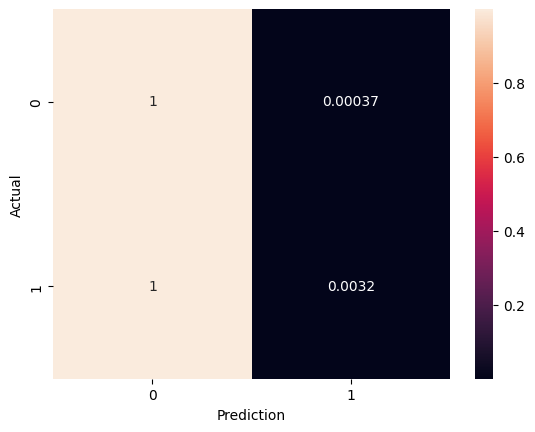



Accuracy: 98.38%
Precision: 12.31%
Recall: 0.32%
F1: 0.63%


In [158]:
rfc_model = RandomForestClassifier(class_weight='balanced')
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)